In [1]:
import cv2  
import tensorflow as tf  
import numpy as np  
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
import os
%matplotlib inline

In [2]:
params = {
            'axes.labelsize': '16',
            'xtick.labelsize': '16',
            'ytick.labelsize': '5',
            'lines.linewidth': '2',
            'legend.fontsize': '20',
            'figure.figsize': '26, 24'  # set figure size
        }
pylab.rcParams.update(params)

In [3]:
def image_pre(filename):
    #kernel = np.ones((3,3),np.uint8)
    im = cv2.imread(filename,0)
    #im = cv2.threshold(im,127,255,cv2.THRESH_BINARY)
    im = cv2.normalize(im,im,0,1,cv2.NORM_MINMAX,5)
    #plt.imshow(im, 'gray')
    im = np.reshape(im, [-1, 784])
    return im

In [4]:
#from sys import path  
#path.append('../..')  
#from common import extract_mnist  
  
#初始化单个卷积核上的参数  
def weight_variable(shape):  
    initial = tf.truncated_normal(shape, stddev=0.1)  
    return tf.Variable(initial)  
  
#初始化单个卷积核上的偏置值  
def bias_variable(shape):  
    initial = tf.constant(0.1, shape=shape)  
    return tf.Variable(initial)  
  
#输入特征x，用卷积核W进行卷积运算，strides为卷积核移动步长，  
#padding表示是否需要补齐边缘像素使输出图像大小不变  
def conv2d(x, W):  
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')  
  
#对x进行最大池化操作，ksize进行池化的范围，  
def max_pool_2x2(x):  
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')  
  
  
def num_recog(filePath,number):  
      
    #定义会话  
    sess = tf.InteractiveSession()  
      
    #声明输入图片数据，类别  
    x = tf.placeholder('float',[None,784])  
    x_img = tf.reshape(x , [-1,28,28,1])  
  
    W_conv1 = weight_variable([5, 5, 1, 32])  
    b_conv1 = bias_variable([32])  
    W_conv2 = weight_variable([5,5,32,64])  
    b_conv2 = bias_variable([64])  
    W_fc1 = weight_variable([7*7*64,1024])  
    b_fc1 = bias_variable([1024])  
    W_fc2 = weight_variable([1024,10])  
    b_fc2 = bias_variable([10])  
  
    saver = tf.train.Saver()   
    saver.restore(sess , '../model/model.ckpt')  
  
    #进行卷积操作，并添加relu激活函数  
    h_conv1 = tf.nn.relu(conv2d(x_img,W_conv1) + b_conv1)  
    #进行最大池化  
    h_pool1 = max_pool_2x2(h_conv1)  
  
    #同理第二层卷积层  
    h_conv2 = tf.nn.relu(conv2d(h_pool1,W_conv2) + b_conv2)  
    h_pool2 = max_pool_2x2(h_conv2)  
      
    #将卷积的产出展开  
    h_pool2_flat = tf.reshape(h_pool2,[-1,7*7*64])  
    #神经网络计算，并添加relu激活函数  
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat,W_fc1) + b_fc1)  
  
    #输出层，使用softmax进行多分类  
    y_conv=tf.nn.softmax(tf.matmul(h_fc1, W_fc2) + b_fc2)  
  
    # mnist_data_set = extract_mnist.MnistDataSet('../../data/')  
    # x_img , y  = mnist_data_set.next_train_batch(1)  

    #图片预处理  
    #数据从0~255转为-0.5~0.5  
    #img_gray = (im - (255 / 2.0)) / 255  
    #cv2.imshow('out',img_gray)  
    #cv2.waitKey(0)  
    #x_img = np.reshape(im , [-1 , 784]) 
    total_img = []
    filename_list = os.listdir(filePath)
    for i, filename in enumerate(filename_list):
        file = os.path.join(filePath, filename)
        file_display = file
        im = image_pre(file)
        total_img.append(im)
        img_display = cv2.imread(file_display)
        plt.subplot(10, 10, i + 1)
        plt.imshow(img_display)
        plt.axis('off')
    plt.show()
    total_img = np.array(total_img)
    total_img =  np.reshape(total_img,[-1,784])
    output = sess.run(y_conv , feed_dict = {x:total_img})  
    #print ('the y_con :   ', '\n',output) 
    predict_num = list(np.argmax(output, 1)) 
    print ('the predict is : ')
    for i, num in enumerate(predict_num):
        i += 1
        print(num,end = ' ')
        if i % 10 == 0:
            print('\n')
    #print(np.argmax(output, 1))
  
    #关闭会话  
    sess.close()  


INFO:tensorflow:Restoring parameters from ../model/model.ckpt


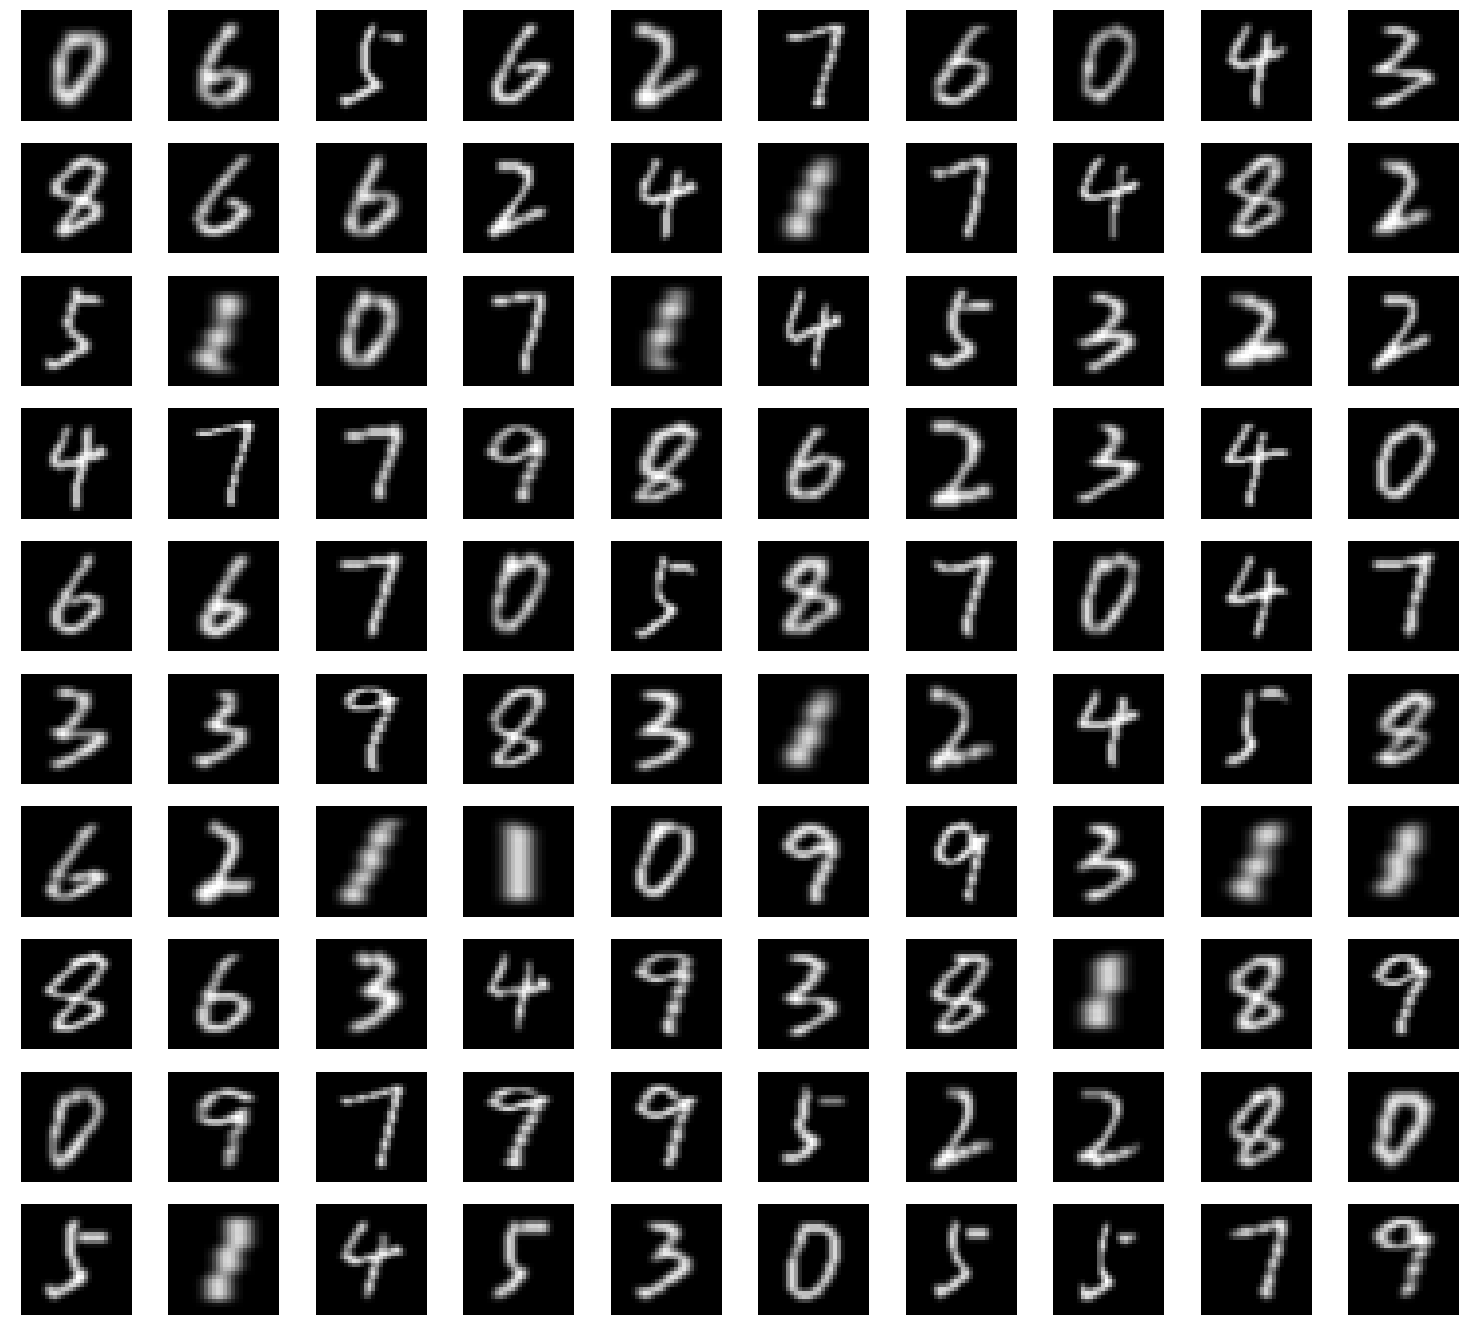

the predict is : 
0 6 5 6 2 7 6 0 4 3 

8 6 6 2 4 1 7 4 8 2 

5 1 0 7 1 4 5 3 2 2 

4 7 7 9 8 6 2 3 4 0 

6 6 7 0 5 8 7 0 4 7 

3 3 7 8 3 1 2 4 5 8 

6 2 1 1 0 9 9 3 1 1 

8 6 3 4 7 3 8 1 8 9 

0 9 7 7 7 5 2 2 8 0 

5 1 4 5 3 0 5 5 7 7 



In [5]:
num_recog('../data/extract_nums/processed_num/',100)